In [2]:
import screed
import matplotlib.pyplot as plt
from mpltools import style
import numpy as np
from mpld3 import enable_notebook
%matplotlib inline

/opt/anaconda/lib/python2.7/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


In [2]:
enable_notebook()

In [3]:
%%bash
pear -j 10 -f /var/seq_data/Chazy/ITS_SIP/Pool1/Read1.fastq -r /var/seq_data/Chazy/ITS_SIP/Pool1/Read2.fastq -o /var/seq_data/Chazy/ITS_SIP/Pool1/pear_merged_raw-$(date +%F)

 ____  _____    _    ____ 
|  _ \| ____|  / \  |  _ \
| |_) |  _|   / _ \ | |_) |
|  __/| |___ / ___ \|  _ <
|_|   |_____/_/   \_\_| \_\

PEAR v0.9.2 [March 26 2014]

Citation - PEAR: a fast and accurate Illumina Paired-End reAd mergeR
Zhang et al (2014) Bioinformatics 30(5): 614-620 | doi:10.1093/bioinformatics/btt593

Forward reads file.................: /var/seq_data/Chazy/ITS_SIP/Pool1/Read1.fastq
Reverse reads file.................: /var/seq_data/Chazy/ITS_SIP/Pool1/Read2.fastq
PHRED..............................: 33
Using empirical frequencies........: YES
Statistical method.................: OES
Maximum assembly length............: 999999
Minimum assembly length............: 50
p-value............................: 0.010000
Quality score threshold (trimming).: 0
Minimum read size after trimming...: 1
Maximal ratio of uncalled bases....: 1.000000
Minimum overlap....................: 10
Scoring method.....................: Scaled score
Threads............................: 10

Alloc

In [4]:
import screed

In [6]:
screed.read_fastq_sequences("/var/seq_data/Chazy/ITS_SIP/Pool1/pear_merged_raw-2015-08-28.assembled.fastq")

<ScreedDB, '/var/seq_data/Chazy/ITS_SIP/Pool1/pear_merged_raw-2015-08-28.assembled.fastq_screed'>

In [3]:
fqdb = screed.ScreedDB("/var/seq_data/Chazy/ITS_SIP/Pool1/pear_merged_raw-2015-08-28.assembled.fastq_screed")

In [4]:
record = fqdb[fqdb.keys()[0]]

In [5]:
record["sequence"]

'GTACGCGGCGAGCGCTGATGAAGCTTGTGGCAATCACGATCACGATGACCGCGATTCCTGTTCCCACAAACGCCACCCACGTCATATGCAAACCGGGCAACTCCGTGTTATTGCCCGT'

In [6]:
lengths = []
for read in fqdb.itervalues():
    lengths.append((len(read["sequence"])))

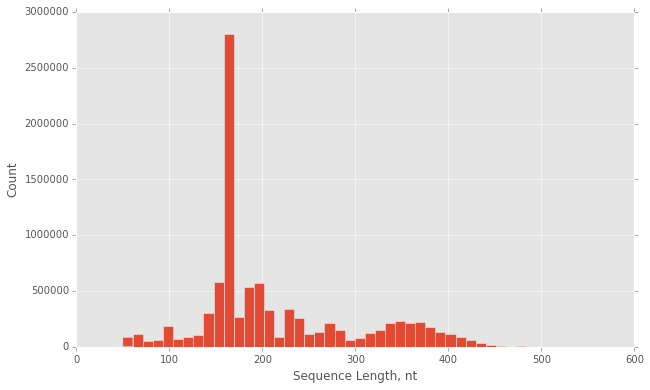

In [7]:
style.use("ggplot")
fig = plt.figure()
ax = fig.add_subplot(111)
h = ax.hist(np.array(lengths), bins=50)
xl = ax.set_xlabel("Sequence Length, nt")
yl = ax.set_ylabel("Count")
fig.set_size_inches((10,6))